In [26]:
import pandas as pd

In [27]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:
dataset = pd.read_csv('https://raw.githubusercontent.com/akjadon/HH/master/Python/Regression/02%20-%20Multiple%20Linear%20Regression/50_Startups.csv',sep=',')

In [29]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [35]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

In [39]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder= LabelEncoder()
#onehotencoder is used to convert categorical values to numerical assignment values

In [41]:
x[:,3]= labelencoder.fit_transform(x[:,3])


In [42]:
x

array([[165349.2, 136897.8, 471784.1, 2],
       [162597.7, 151377.59, 443898.53, 0],
       [153441.51, 101145.55, 407934.54, 1],
       [144372.41, 118671.85, 383199.62, 2],
       [142107.34, 91391.77, 366168.42, 1],
       [131876.9, 99814.71, 362861.36, 2],
       [134615.46, 147198.87, 127716.82, 0],
       [130298.13, 145530.06, 323876.68, 1],
       [120542.52, 148718.95, 311613.29, 2],
       [123334.88, 108679.17, 304981.62, 0],
       [101913.08, 110594.11, 229160.95, 1],
       [100671.96, 91790.61, 249744.55, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [91992.39, 135495.07, 252664.93, 0],
       [119943.24, 156547.42, 256512.92, 1],
       [114523.61, 122616.84, 261776.23, 2],
       [78013.11, 121597.55, 264346.06, 0],
       [94657.16, 145077.58, 282574.31, 2],
       [91749.16, 114175.79, 294919.57, 1],
       [86419.7, 153514.11, 0.0, 2],
       [76253.86, 113867.3, 298664.47, 0],
       [78389.47, 153773.43, 299737.29, 2],
       [73994.56, 122782.75, 30331

In [43]:
onehotencoder = OneHotEncoder(categorical_features=[3])
#dataset.State.unique() == 3

In [44]:
x = onehotencoder.fit_transform(x).toarray()

E:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [45]:
x = pd.DataFrame(x)
x

,0,1,2,3,4,5
0,0.0,0.0,1.0,165349.20,136897.80,471784.10
1,1.0,0.0,0.0,162597.70,151377.59,443898.53
2,0.0,1.0,0.0,153441.51,101145.55,407934.54
3,0.0,0.0,1.0,144372.41,118671.85,383199.62
4,0.0,1.0,0.0,142107.34,91391.77,366168.42
5,0.0,0.0,1.0,131876.90,99814.71,362861.36
6,1.0,0.0,0.0,134615.46,147198.87,127716.82
7,0.0,1.0,0.0,130298.13,145530.06,323876.68
8,0.0,0.0,1.0,120542.52,148718.95,311613.29
9,1.0,0.0,0.0,123334.88,108679.17,304981.62


In [11]:
x.shape

(50, 6)

In [12]:
x = x[:,1:]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [16]:
xtrain = pd.DataFrame(x_train)

In [17]:
ytrain = pd.DataFrame(y_train)

In [18]:
xtest = pd.DataFrame(x_test)

In [19]:
ytest = pd.DataFrame(y_test)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
regressor.score(x_test,y_test)

0.9347068473283249

In [22]:
y_test_pred= pd.DataFrame(regressor.predict(x_test),columns= ['y_test_pred'])
x_test_pred= pd.DataFrame(regressor.predict(x_train),columns= ['x_train_pred'])

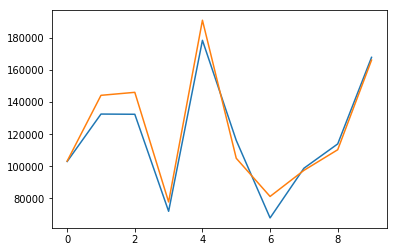

In [23]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(y_test_pred)
ax1.plot(ytest)

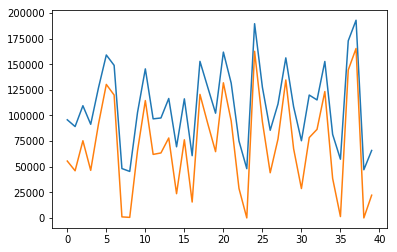

In [26]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(x_test_pred)
ax1.plot(xtrain[2])